## Predicting the number of cigarettes smoked per week from a measure of risk taking in a social context (Domain-Specific Risk-Taking (DOSPERT) Scale )
**This is private data. Please do not share**

* Date: 2017 - 12 - 22

* Version: 1
* Editors: Fionn Delahunty 

------- 

This notebook (R code) investigates if the Domain-Specific Risk-Taking (DOSPERT) Scale social context  measure is a predictor of the number of cigarettes smoked in a week in the sample data. 



__Summary of steps__

_ Exploratory data analysis _ 
1. Dataset import 
2. Testing distribution of risk taking measure
3. Testing distribution of number of cigarettes smoked measure 

_ Model building _ 

4. Investigating the two variables together 
5. Investigating modeling using logistic regression
5. Investigating modeling using additive regression 
6. Investigating modeling using regression trees 


------
__ Conclusion __
Overall, there is very little difference in social risk taking between between groups of smokers. This difference dose not lend itself to an easy prediction, and realasticly is probally not worth predicting. Fundementally there is no statically significant difference between smoking groups based on social risk taking 


### 1. Dataset Import

In [160]:
data <- read.csv(file="Risklab_2.4.csv", header=TRUE, sep=",")
#names(data)

### 2. Testing distribution of risk taking measure

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,1328,31.74925,5.785509,32,32.09868,5.9304,8,42,34,-0.607278,0.3674582,0.1587605


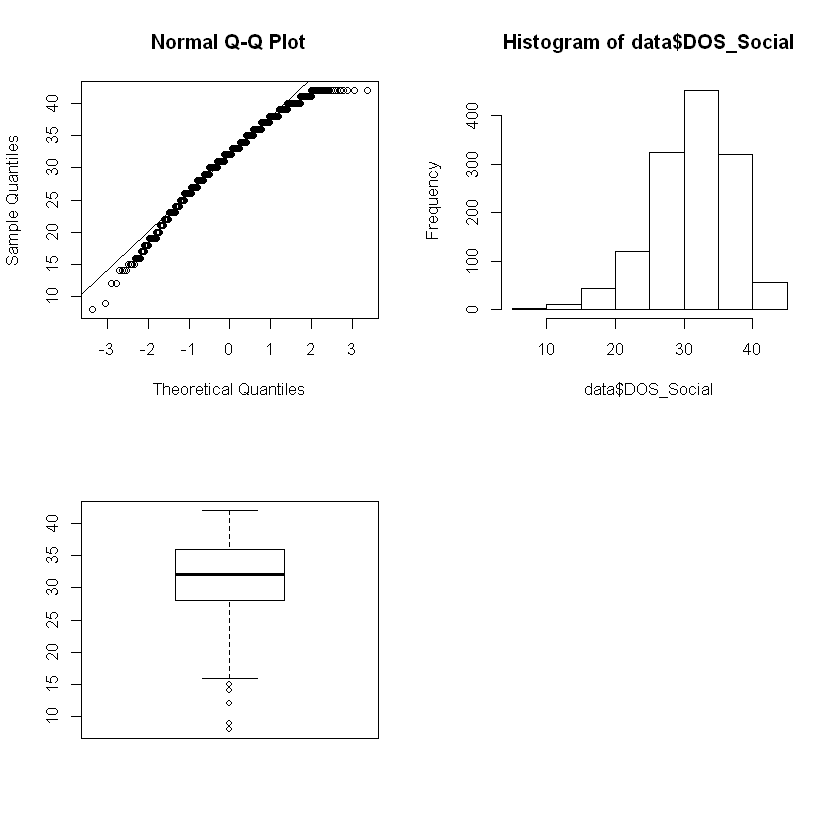

In [2]:
library(psych)
describe(data$DOS_Social)
par(mfrow = c(2,2))

qqnorm(data$DOS_Social)
qqline(data$DOS_Social)

hist(data$DOS_Social)
boxplot(data$DOS_Social)

__ Notes __
* Distribution looks good, slight tail at the upper tail (Prob due to the distribution being righly skewed). 
* Some outlining  values to lower ends of the scale, but don't expect this to be a massive problem given the size of the dataset. 

### 3. Testing the distribution of Cigarettes smoked per week 


   0    1    2    3    4    5    6    7    8   10   14   15   20   21   25   28 
1064    9   12   10    3   13    2    8    2   19    4    5   16    7    3    6 
  30   35   40   42   45   50   54   56   60   70   72   84   90  100  105  112 
   4   21    5    5    1    5    2    1    1   39    1    4    1    3   18    1 
 140  175  280  420 
  24    6    2    1 

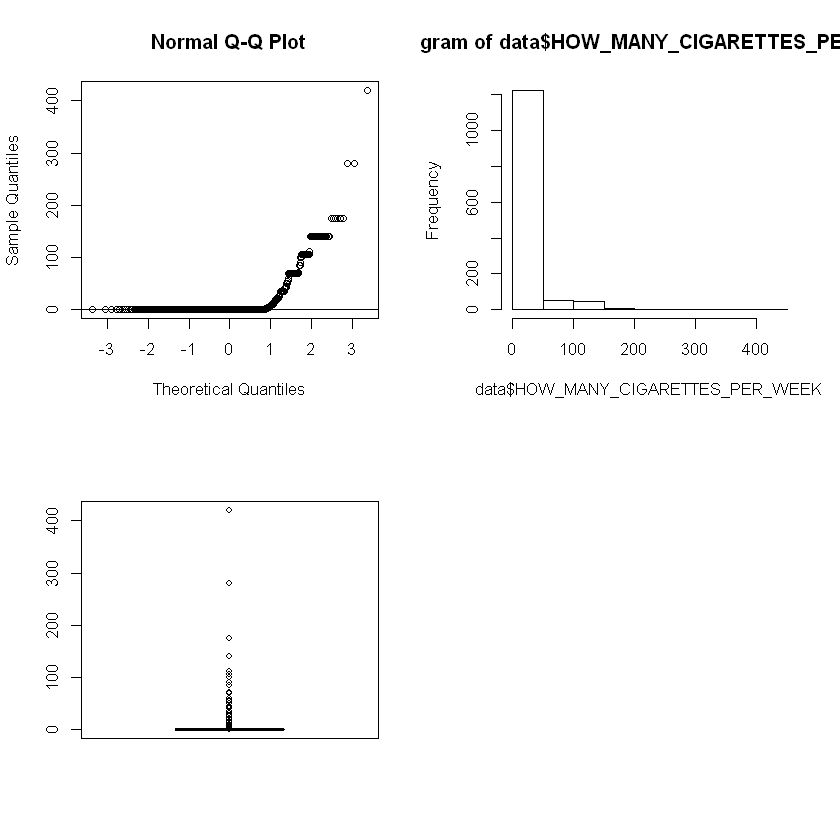

In [3]:
library(psych)

#Changing all null values to 0
data$HOW_MANY_CIGARETTES_PER_WEEK[is.na(data$HOW_MANY_CIGARETTES_PER_WEEK)] <- 0


table(data$HOW_MANY_CIGARETTES_PER_WEEK)
par(mfrow = c(2,2))

qqnorm(data$HOW_MANY_CIGARETTES_PER_WEEK)
qqline(data$HOW_MANY_CIGARETTES_PER_WEEK)

hist(data$HOW_MANY_CIGARETTES_PER_WEEK)
boxplot(data$HOW_MANY_CIGARETTES_PER_WEEK)

__ Notes: __ 
* Our distribution of CSPW is unuseable in it's current state. The spread of the data is a problem, below we slipt the varible into 7 levels by breaks of 25. We do this twice, one to inc the 1024 zero values and one which one inc + 1 values 

cigarette
   (0,25]   (25,50]   (50,75]  (75,100] (100,125] (125,150] (150,175] 
      113        47        44         8        19        24         6 

cigarette_zero_inc
  (-1,24]   (24,49]   (49,74]   (74,99]  (99,124] (124,149] (149,174] 
     1174        45        49         5        22        24         0 

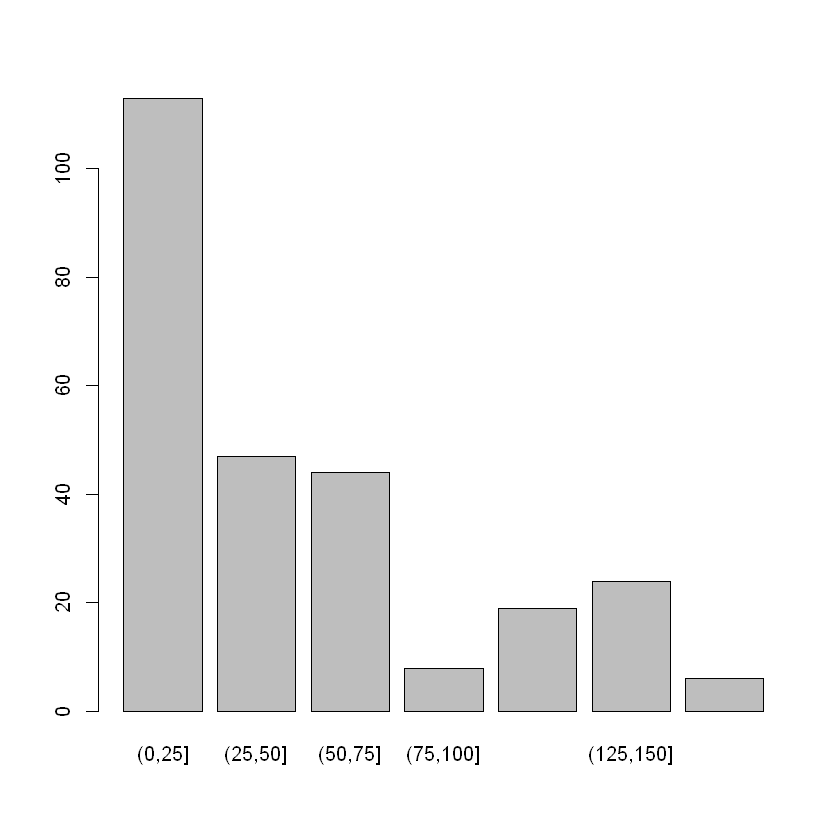

In [24]:
cigarette <- cut(data$HOW_MANY_CIGARETTES_PER_WEEK, breaks = seq(0, 175, by = 25))
cigarette_zero_inc <- cut(data$HOW_MANY_CIGARETTES_PER_WEEK, breaks = seq(-1, 175, by = 25))


table(cigarette)
table(cigarette_zero_inc)
plot(cigarette)

## 4. Investigating the two variables together 
1. We start with a simple anova comparing the seven levels. 
2. We recode the levels as dummy varibles and perform a linear regression

[1] "Anova"


                      Df Sum Sq Mean Sq F value Pr(>F)
as.factor(cigarette)   6    141   23.57   0.793  0.576
Residuals            254   7549   29.72               
1067 observations deleted due to missingness

[1] " ----------------------------------------------------------------------------------------------------- "



	Kruskal-Wallis rank sum test

data:  data$DOS_Social and as.factor(cigarette)
Kruskal-Wallis chi-squared = 5.4839, df = 6, p-value = 0.4834


[1] " ----------------------------------------------------------------------------------------------------- "


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data$DOS_Social ~ as.factor(cigarette))

$`as.factor(cigarette)`
                           diff        lwr       upr     p adj
(25,50]-(0,25]      -0.15044248  -2.962728  2.661843 0.9999986
(50,75]-(0,25]      -0.01407884  -2.893279  2.865121 1.0000000
(75,100]-(0,25]      1.84955752  -4.078276  7.777391 0.9678825
(100,125]-(0,25]    -2.25570564  -6.273229  1.761818 0.6375184
(125,150]-(0,25]     0.39122419  -3.250466  4.032914 0.9999134
(150,175]-(0,25]     1.51622419  -5.271843  8.304292 0.9943778
(50,75]-(25,50]      0.13636364  -3.262494  3.535221 0.9999998
(75,100]-(25,50]     2.00000000  -4.196906  8.196906 0.9620889
(100,125]-(25,50]   -2.10526316  -6.510140  2.299614 0.7903776
(125,150]-(25,50]    0.54166667  -3.523348  4.606682 0.9996958
(150,175]-(25,50]    1.66666667  -5.357599  8.690932 0.9922075
(75,100]-(50,75]     1.86363636  -4.363923  8.091195 0.9739105
(100,125]-(50,75]   -

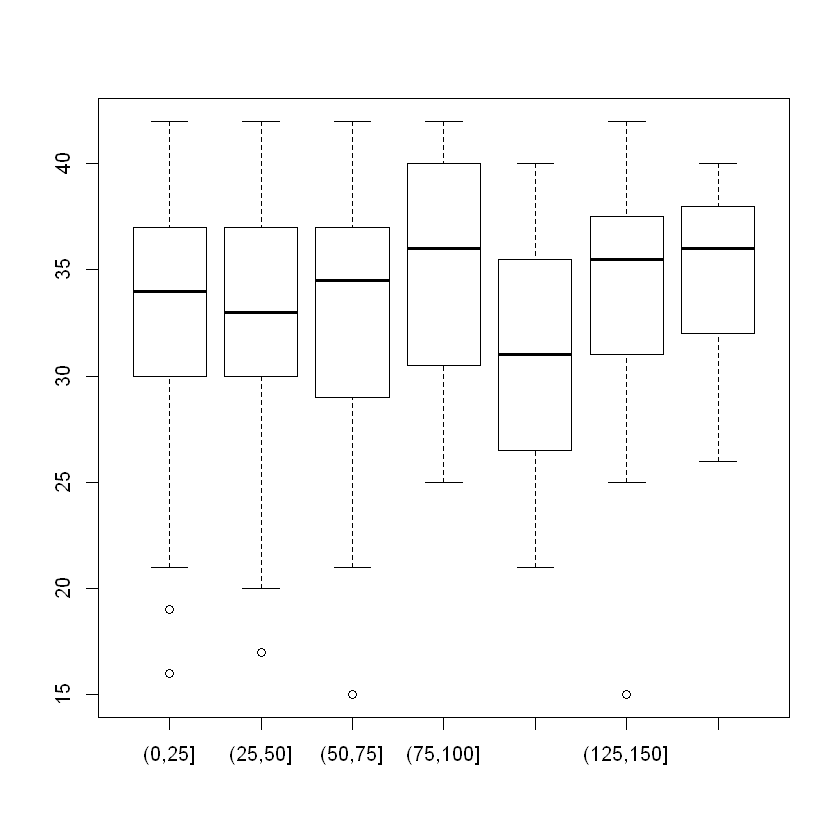

In [162]:
boxplot(data$DOS_Social~cigarette)
anovatest<-aov(data$DOS_Social~as.factor(cigarette),)
library(xtable)
print ("Anova")
summary(anovatest)
print(" ----------------------------------------------------------------------------------------------------- ")
kruskal.test(data$DOS_Social,as.factor(cigarette))
print(" ----------------------------------------------------------------------------------------------------- ")
TukeyHSD(anovatest)

__ Notes: __
* ANOVA: Did not regret the null hypothesis, sample size might have been an issue
* KW: Same as above, but sample size can't really be an issue here
* Boxplot: Yes there is a difference in means, but __ A: __ it's not very big and __ B: __ it's not in one direction (Increasing or decreasing) 
* We also see quite a large spread in the box plot for each grouping 

In [131]:
#Create N 
n<-dim(data)[1]
#Create new var
first<-rep(0,n);
second<-rep(0,n);
third<-rep(0,n)
forth<-rep(0,n)
fifth<-rep(0,n)
sixth<-rep(0,n)
seven<-rep(0,n)
#Assign var 1/0 based on grouping 
first[cigarette=='(0,25]']<-1;
second[cigarette=='(25,50]']<-1;
third[cigarette=='(50,75]']<-1;
forth[cigarette=='(75,100]']<-1;
fifth[cigarette=='(100,125]']<-1;
sixth[cigarette=='(125,150]']<-1;
seven[cigarette=='(150,175]']<-1;

#Create new dataframe with names
data2<-cbind(first,second,third,forth,fifth,sixth,seven)
names(data2)<-c("first","second","third","forth","fifth","sixth","seven",names(data))
data2 <-data.frame(data2)

#Perform LM
#First dropped to act as baseline 
regmod<-lm(data$DOS_Social~second+third+forth+fifth+sixth+seven-1,data=data2)
summary(regmod)


Call:
lm(formula = data$DOS_Social ~ second + third + forth + fifth + 
    sixth + seven - 1, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-18.54  26.00  31.00  35.00  42.00 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
second   33.000      4.434   7.443 1.77e-13 ***
third    33.136      4.582   7.231 8.07e-13 ***
forth    35.000     10.747   3.257  0.00116 ** 
fifth    30.895      6.973   4.430 1.02e-05 ***
sixth    33.542      6.205   5.406 7.64e-08 ***
seven    34.667     12.409   2.794  0.00529 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30.4 on 1322 degrees of freedom
Multiple R-squared:  0.1169,	Adjusted R-squared:  0.1129 
F-statistic: 29.16 on 6 and 1322 DF,  p-value: < 2.2e-16


__ Notes: __ 
* Regression model suggests that all 6 levels have an interaction effect with DOS_Social when the first level is taken as a baseline. 

## 4. Additive model  
* Here we try an additive model to investigate the interaction of DOS Social & DOS Recreational while holding for smoking 


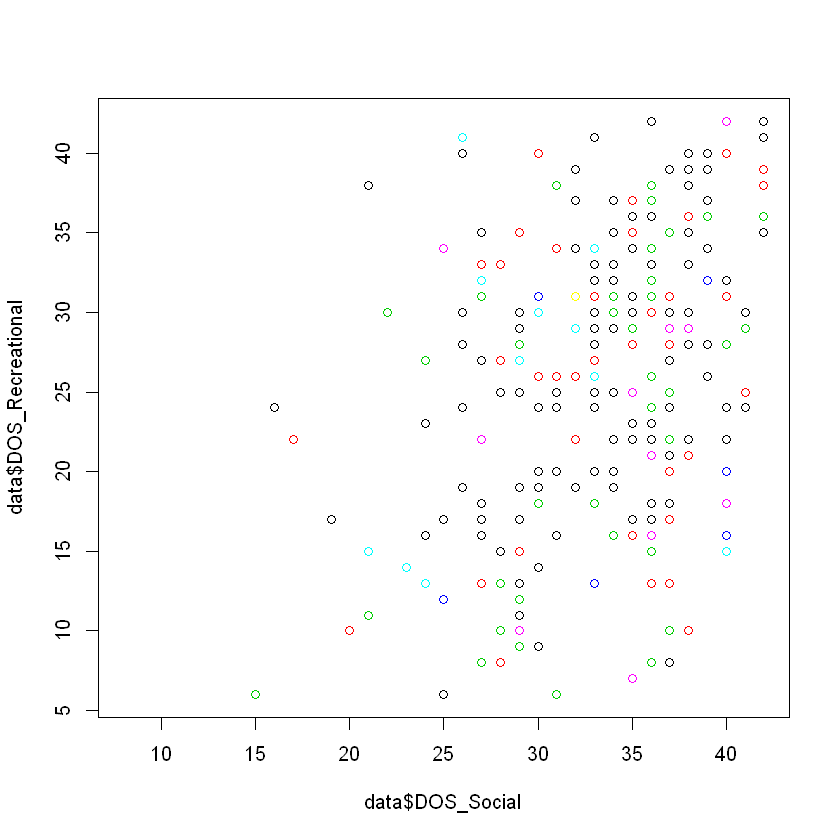

In [140]:
plot(data$DOS_Social,data$DOS_Recreational,col=cigarette)

In [149]:
regmod<-lm(data$DOS_Social~data$DOS_Recreational+second+third+forth+fifth+sixth+seven-1,data=data2)
summary(regmod)


Call:
lm(formula = data$DOS_Social ~ data$DOS_Recreational + second + 
    third + forth + fifth + sixth + seven - 1, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.999  -4.811   3.582  11.759  34.974 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
data$DOS_Recreational  1.17092    0.01282  91.362   <2e-16 ***
second                 2.40655    1.67336   1.438   0.1506    
third                  4.31571    1.72360   2.504   0.0124 *  
forth                  8.94698    3.98414   2.246   0.0249 *  
fifth                  1.99145    2.59796   0.767   0.4435    
sixth                  3.73194    2.31743   1.610   0.1076    
seven                  5.19846    4.60001   1.130   0.2586    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.24 on 1321 degrees of freedom
Multiple R-squared:  0.8793,	Adjusted R-squared:  0.8787 
F-statistic:  1375 on 7 and 1321 DF,  p-value: < 2.2e-16


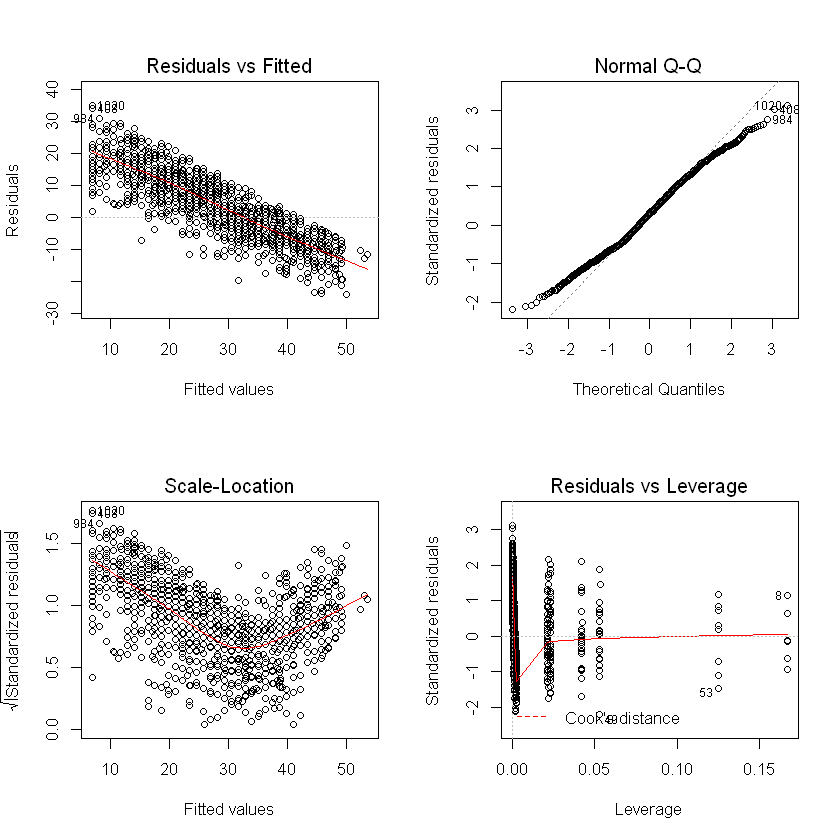

In [145]:
par(mfrow=c(2,2))
plot(regmod)
p<-locator()
cooksd<-cooks.distance(regmod)


__ Notes: __
* By adding DOS_Recreational it makes our model worse. There dosen't seem to be much point in going forward with this model  

## 5. BIS Stepwise Model 

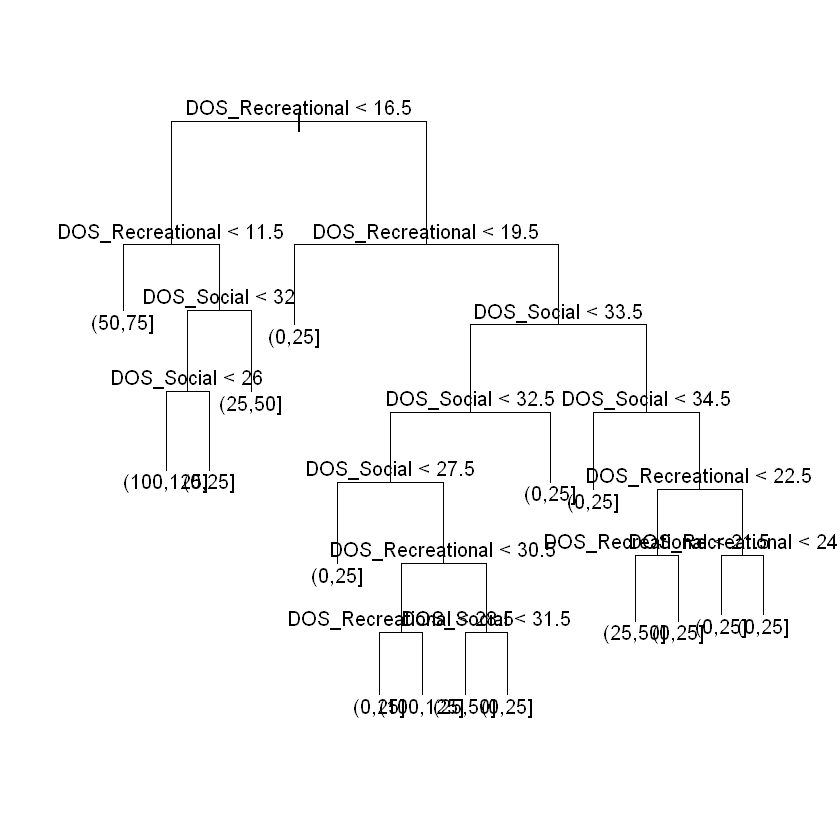

In [159]:


library(tree)
tree1 <- tree(cigarette ~ DOS_Social + DOS_Recreational , data = data)

#par(nfrow=c(1,1))
plot(tree1)
text(tree1)
